#Montamos google drive.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Leemos los datos desde el archivo en drive y los ponemos en un dataframe.
https://www.kaggle.com/datasets/meetnagadia/amazon-kindle-book-review-for-sentiment-analysis?select=preprocessed_kindle_review+.csv

In [2]:
from pandas.core.frame import DataFrame
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/MCD/4_PCD/Tarea02/all_kindle_review .csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,asin,helpful,rating,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,11539,B0033UV8HI,"[8, 10]",3,"Jace Rankin may be short, but he's nothing to ...","09 2, 2010",A3HHXRELK8BHQG,Ridley,Entertaining But Average,1283385600
1,1,5957,B002HJV4DE,"[1, 1]",5,Great short read. I didn't want to put it dow...,"10 8, 2013",A2RGNZ0TRF578I,Holly Butler,Terrific menage scenes!,1381190400
2,2,9146,B002ZG96I4,"[0, 0]",3,I'll start by saying this is the first of four...,"04 11, 2014",A3S0H2HV6U1I7F,Merissa,Snapdragon Alley,1397174400
3,3,7038,B002QHWOEU,"[1, 3]",3,Aggie is Angela Lansbury who carries pocketboo...,"07 5, 2014",AC4OQW3GZ919J,Cleargrace,very light murder cozy,1404518400
4,4,1776,B001A06VJ8,"[0, 1]",4,I did not expect this type of book to be in li...,"12 31, 2012",A3C9V987IQHOQD,Rjostler,Book,1356912000


In [3]:
df.columns = ['id0', 'id1', 'asin', 'helpful', 'Score', 'Text', 'reviewTime', 'reviewerID', 'reviewerName', 'Summary', 'Time']
df.head()

,id0,id1,asin,helpful,Score,Text,reviewTime,reviewerID,reviewerName,Summary,Time
0,0,11539,B0033UV8HI,"[8, 10]",3,"Jace Rankin may be short, but he's nothing to ...","09 2, 2010",A3HHXRELK8BHQG,Ridley,Entertaining But Average,1283385600
1,1,5957,B002HJV4DE,"[1, 1]",5,Great short read. I didn't want to put it dow...,"10 8, 2013",A2RGNZ0TRF578I,Holly Butler,Terrific menage scenes!,1381190400
2,2,9146,B002ZG96I4,"[0, 0]",3,I'll start by saying this is the first of four...,"04 11, 2014",A3S0H2HV6U1I7F,Merissa,Snapdragon Alley,1397174400
3,3,7038,B002QHWOEU,"[1, 3]",3,Aggie is Angela Lansbury who carries pocketboo...,"07 5, 2014",AC4OQW3GZ919J,Cleargrace,very light murder cozy,1404518400
4,4,1776,B001A06VJ8,"[0, 1]",4,I did not expect this type of book to be in li...,"12 31, 2012",A3C9V987IQHOQD,Rjostler,Book,1356912000


#Creamos un dataset con los datos que vamos a analizar.

In [4]:
dataset = df[['Score', 'Time', 'Summary', 'Text']]
dataset.head()

,Score,Time,Summary,Text
0,3,1283385600,Entertaining But Average,"Jace Rankin may be short, but he's nothing to ..."
1,5,1381190400,Terrific menage scenes!,Great short read. I didn't want to put it dow...
2,3,1397174400,Snapdragon Alley,I'll start by saying this is the first of four...
3,3,1404518400,very light murder cozy,Aggie is Angela Lansbury who carries pocketboo...
4,4,1356912000,Book,I did not expect this type of book to be in li...


In [5]:
rows, cols = dataset.shape

In [6]:
N = rows - 5000
dataset = dataset.iloc[:-N , :]
dataset.shape

(5000, 4)

In [7]:
import re

# Define a function to clean the text
def clean(text):
    # Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', text) 
    return text

# Cleaning the text in the review column
dataset['Cleaned Reviews'] = dataset['Text'].apply(clean)
dataset.head()

,Score,Time,Summary,Text,Cleaned Reviews
0,3,1283385600,Entertaining But Average,"Jace Rankin may be short, but he's nothing to ...",Jace Rankin may be short but he s nothing to m...
1,5,1381190400,Terrific menage scenes!,Great short read. I didn't want to put it dow...,Great short read I didn t want to put it down ...
2,3,1397174400,Snapdragon Alley,I'll start by saying this is the first of four...,I ll start by saying this is the first of four...
3,3,1404518400,very light murder cozy,Aggie is Angela Lansbury who carries pocketboo...,Aggie is Angela Lansbury who carries pocketboo...
4,4,1356912000,Book,I did not expect this type of book to be in li...,I did not expect this type of book to be in li...


In [8]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

dataset['POS tagged'] = dataset['Cleaned Reviews'].apply(token_stop_pos)
dataset.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,Score,Time,Summary,Text,Cleaned Reviews,POS tagged
0,3,1283385600,Entertaining But Average,"Jace Rankin may be short, but he's nothing to ...",Jace Rankin may be short but he s nothing to m...,"[(Jace, n), (Rankin, n), (may, None), (short, ..."
1,5,1381190400,Terrific menage scenes!,Great short read. I didn't want to put it dow...,Great short read I didn t want to put it down ...,"[(Great, n), (short, a), (read, n), (want, v),..."
2,3,1397174400,Snapdragon Alley,I'll start by saying this is the first of four...,I ll start by saying this is the first of four...,"[(start, r), (saying, v), (first, a), (four, N..."
3,3,1404518400,very light murder cozy,Aggie is Angela Lansbury who carries pocketboo...,Aggie is Angela Lansbury who carries pocketboo...,"[(Aggie, n), (Angela, n), (Lansbury, n), (carr..."
4,4,1356912000,Book,I did not expect this type of book to be in li...,I did not expect this type of book to be in li...,"[(expect, v), (type, n), (book, n), (library, ..."


In [9]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos: 
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:  
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew
    
dataset['Lemma'] = dataset['POS tagged'].apply(lemmatize)
dataset.head()

,Score,Time,Summary,Text,Cleaned Reviews,POS tagged,Lemma
0,3,1283385600,Entertaining But Average,"Jace Rankin may be short, but he's nothing to ...",Jace Rankin may be short but he s nothing to m...,"[(Jace, n), (Rankin, n), (may, None), (short, ...",Jace Rankin may short nothing mess man haul ...
1,5,1381190400,Terrific menage scenes!,Great short read. I didn't want to put it dow...,Great short read I didn t want to put it down ...,"[(Great, n), (short, a), (read, n), (want, v),...",Great short read want put read one sit sex s...
2,3,1397174400,Snapdragon Alley,I'll start by saying this is the first of four...,I ll start by saying this is the first of four...,"[(start, r), (saying, v), (first, a), (four, N...",start say first four book expect conclude ce...
3,3,1404518400,very light murder cozy,Aggie is Angela Lansbury who carries pocketboo...,Aggie is Angela Lansbury who carries pocketboo...,"[(Aggie, n), (Angela, n), (Lansbury, n), (carr...",Aggie Angela Lansbury carry pocketbooks inst...
4,4,1356912000,Book,I did not expect this type of book to be in li...,I did not expect this type of book to be in li...,"[(expect, v), (type, n), (book, n), (library, ...",expect type book library pleased find price ...


In [10]:
dataset[['Text', 'Lemma']]

,Text,Lemma
0,"Jace Rankin may be short, but he's nothing to ...",Jace Rankin may short nothing mess man haul ...
1,Great short read. I didn't want to put it dow...,Great short read want put read one sit sex s...
2,I'll start by saying this is the first of four...,start say first four book expect conclude ce...
3,Aggie is Angela Lansbury who carries pocketboo...,Aggie Angela Lansbury carry pocketbooks inst...
4,I did not expect this type of book to be in li...,expect type book library pleased find price ...
...,...,...
4995,The first three of these books fit together wo...,first three book fit together wonderfully op...
4996,A short story. It was okay but I have to say t...,short story okay say felt lead female annoy ...
4997,When I read these type of stories I put myself...,read type story put Think Much mode pick cha...
4998,I was hoping to enjoy this book because it is ...,hop enjoy book series always look new author...


#Analisis de sentimiento usando TextBlob

In [11]:
from textblob import TextBlob

# function to calculate subjectivity 
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity

# function to calculate polarity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [12]:
fin_data = pd.DataFrame(dataset[['Text', 'Lemma']])

In [13]:
# fin_data['Subjectivity'] = fin_data['Lemma'].apply(getSubjectivity) 
fin_data['Polarity'] = fin_data['Lemma'].apply(getPolarity) 
fin_data['Analysis'] = fin_data['Polarity'].apply(analysis)
fin_data.head()

,Text,Lemma,Polarity,Analysis
0,"Jace Rankin may be short, but he's nothing to ...",Jace Rankin may short nothing mess man haul ...,0.119548,Positive
1,Great short read. I didn't want to put it dow...,Great short read want put read one sit sex s...,0.396488,Positive
2,I'll start by saying this is the first of four...,start say first four book expect conclude ce...,0.190000,Positive
3,Aggie is Angela Lansbury who carries pocketboo...,Aggie Angela Lansbury carry pocketbooks inst...,0.460000,Positive
4,I did not expect this type of book to be in li...,expect type book library pleased find price ...,0.392857,Positive


In [14]:
tb_counts = fin_data.Analysis.value_counts()
tb_counts

Positive    4171
Negative     738
Neutral       91
Name: Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x7f81dec25e10>,
 [Text(-0.9541219461302444, 0.547404157741458, 'Positive'),
  Text(0.9212809277803385, -0.6010336530579621, 'Negative'),
  Text(1.3477938956298137, -0.07714671025398075, 'Neutral')],
 [Text(-0.5204301524346787, 0.2985840860407953, '83.4%'),
  Text(0.5025168696983664, -0.3278365380316156, '14.8%'),
  Text(0.8486109713224751, -0.048573854604358244, '1.8%')])

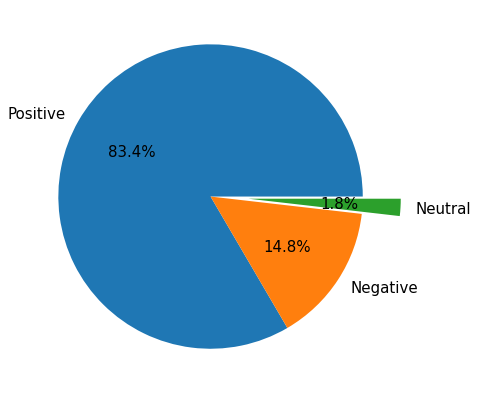

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

tb_count= fin_data.Analysis.value_counts()
plt.figure(figsize=(10, 7))
plt.pie(tb_counts.values, labels = tb_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', textprops={'fontsize': 15}, shadow=False)

#Analisis de sentimiento usando VADER

In [16]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 7.4 MB/s 


In [17]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# function to calculate vader sentiment  
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

fin_data['Vader Sentiment'] = fin_data['Lemma'].apply(vadersentimentanalysis)

In [18]:
# function to analyse 
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'
    
fin_data['Vader Analysis'] = fin_data['Vader Sentiment'].apply(vader_analysis)
fin_data.head()

,Text,Lemma,Polarity,Analysis,Vader Sentiment,Vader Analysis
0,"Jace Rankin may be short, but he's nothing to ...",Jace Rankin may short nothing mess man haul ...,0.119548,Positive,0.8663,Positive
1,Great short read. I didn't want to put it dow...,Great short read want put read one sit sex s...,0.396488,Positive,0.9628,Positive
2,I'll start by saying this is the first of four...,start say first four book expect conclude ce...,0.190000,Positive,0.8555,Positive
3,Aggie is Angela Lansbury who carries pocketboo...,Aggie Angela Lansbury carry pocketbooks inst...,0.460000,Positive,0.1531,Neutral
4,I did not expect this type of book to be in li...,expect type book library pleased find price ...,0.392857,Positive,0.4404,Neutral


In [19]:
vader_counts = fin_data['Vader Analysis'].value_counts()
vader_counts

Positive    3602
Neutral      966
Negative     432
Name: Vader Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x7f81dedfff10>,
 [Text(-0.7660700197516646, 0.9236540071031385, 'Positive'),
  Text(0.4495138517413267, -1.0039608045599573, 'Neutral'),
  Text(1.0597262406839523, -0.2949242187509502, 'Negative')],
 [Text(-0.4468741781884709, 0.538798170810164, '72.0%'),
  Text(0.24518937367708726, -0.5476149843054312, '19.3%'),
  Text(0.5780324949185193, -0.16086775568233644, '8.6%')])

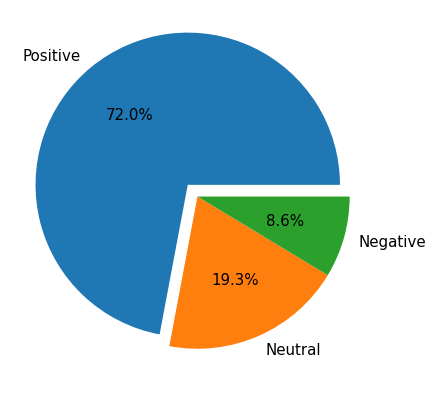

In [20]:
vader_counts= fin_data['Vader Analysis'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0.1, 0, 0), autopct='%1.1f%%', textprops={'fontsize': 15}, shadow=False)

#Analisis using SentiWordNet

In [21]:
nltk.download('sentiwordnet')
from nltk.corpus import sentiwordnet as swn

def sentiwordnetanalysis(pos_data):
    sentiment = 0
    tokens_count = 0
    for word, pos in pos_data:
        if not pos:
            continue
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        if not lemma:
            continue
        
        synsets = wordnet.synsets(lemma, pos=pos)
        if not synsets:
            continue

        # Take the first sense, the most common
        synset = synsets[0]
        swn_synset = swn.senti_synset(synset.name())
        sentiment += swn_synset.pos_score() - swn_synset.neg_score()
        tokens_count += 1
        # print(swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score())
    if not tokens_count:
        return 0
    if sentiment>0:
        return "Positive"
    if sentiment==0:
        return "Neutral"
    else:
        return "Negative"

fin_data['SWN analysis'] = dataset['POS tagged'].apply(sentiwordnetanalysis)
fin_data.head()

[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/sentiwordnet.zip.


,Text,Lemma,Polarity,Analysis,Vader Sentiment,Vader Analysis,SWN analysis
0,"Jace Rankin may be short, but he's nothing to ...",Jace Rankin may short nothing mess man haul ...,0.119548,Positive,0.8663,Positive,Negative
1,Great short read. I didn't want to put it dow...,Great short read want put read one sit sex s...,0.396488,Positive,0.9628,Positive,Positive
2,I'll start by saying this is the first of four...,start say first four book expect conclude ce...,0.190000,Positive,0.8555,Positive,Positive
3,Aggie is Angela Lansbury who carries pocketboo...,Aggie Angela Lansbury carry pocketbooks inst...,0.460000,Positive,0.1531,Neutral,Positive
4,I did not expect this type of book to be in li...,expect type book library pleased find price ...,0.392857,Positive,0.4404,Neutral,Positive


In [22]:
# fin_data.to_csv('/content/drive/MyDrive/MCD/4_PCD/Tarea02/fin_data.csv')

In [23]:
swn_counts= fin_data['SWN analysis'].value_counts()
swn_counts

Positive    3906
Negative     947
Neutral      146
0              1
Name: SWN analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x7f81d487b550>,
 [Text(-0.8502018547257383, 0.6979661927492726, 'Positive'),
  Text(0.7822034190854544, -0.7734066273125833, 'Negative'),
  Text(1.0952473787632484, -0.10214293569422078, 'Neutral'),
  Text(1.0999997828459078, -0.0006911866286447205, '0')],
 [Text(-0.46374646621403903, 0.38070883240869413, '78.1%'),
  Text(0.4266564104102479, -0.4218581603523181, '18.9%'),
  Text(0.59740766114359, -0.055714328560484055, '2.9%'),
  Text(0.5999998815523133, -0.0003770108883516657, '0.0%')])

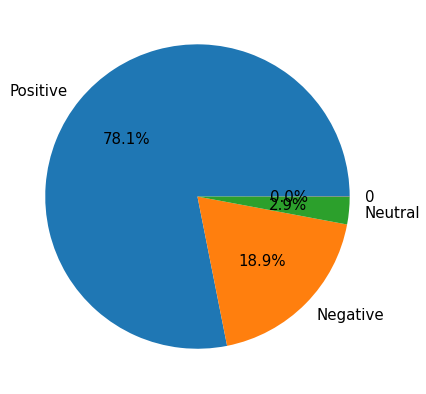

In [24]:
swn_counts= fin_data['SWN analysis'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(swn_counts.values, labels = swn_counts.index, autopct='%1.1f%%', textprops={'fontsize': 15}, shadow=False)

([<matplotlib.patches.Wedge at 0x7f81d47885d0>,
 [Text(-0.8502018547257383, 0.6979661927492726, 'Positive'),
  Text(0.7822034190854544, -0.7734066273125833, 'Negative'),
  Text(1.3441672375730775, -0.12535723926108913, 'Neutral'),
  Text(1.0999997828459078, -0.0006911866286447205, '0')],
 [Text(-0.46374646621403903, 0.38070883240869413, '78.1%'),
  Text(0.4266564104102479, -0.4218581603523181, '18.9%'),
  Text(0.8463275199534191, -0.0789286321273524, '2.9%'),
  Text(0.5999998815523133, -0.0003770108883516657, '0.0%')])

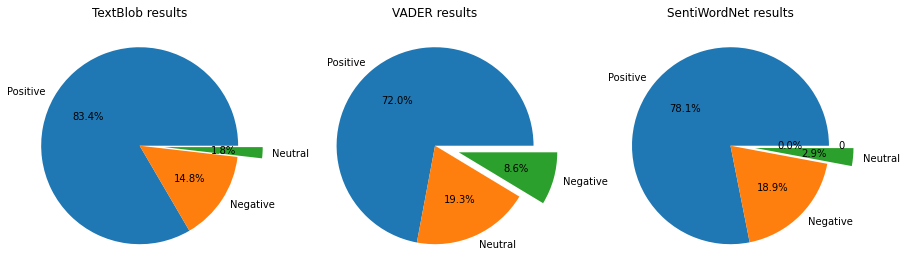

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.title("TextBlob results")
plt.pie(tb_counts.values, labels = tb_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,3,2)
plt.title("VADER results")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,3,3)
plt.title("SentiWordNet results")
plt.pie(swn_counts.values, labels = swn_counts.index, explode = (0, 0, 0.25, 0), autopct='%1.1f%%', shadow=False)

#Analisis de sentimiento con sklearn

In [26]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline

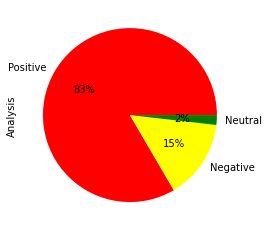

In [27]:
fin_data.Analysis.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])

In [28]:
fin_data.head()

,Text,Lemma,Polarity,Analysis,Vader Sentiment,Vader Analysis,SWN analysis
0,"Jace Rankin may be short, but he's nothing to ...",Jace Rankin may short nothing mess man haul ...,0.119548,Positive,0.8663,Positive,Negative
1,Great short read. I didn't want to put it dow...,Great short read want put read one sit sex s...,0.396488,Positive,0.9628,Positive,Positive
2,I'll start by saying this is the first of four...,start say first four book expect conclude ce...,0.190000,Positive,0.8555,Positive,Positive
3,Aggie is Angela Lansbury who carries pocketboo...,Aggie Angela Lansbury carry pocketbooks inst...,0.460000,Positive,0.1531,Neutral,Positive
4,I did not expect this type of book to be in li...,expect type book library pleased find price ...,0.392857,Positive,0.4404,Neutral,Positive


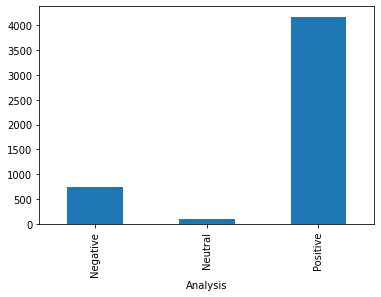

In [29]:
book_sentiment = fin_data.groupby(['Analysis']).Analysis.count()
book_sentiment.plot(kind = 'bar')

In [30]:
# Books
features = fin_data.iloc[:, 0].values
labels = fin_data.iloc[:, 3].values

In [31]:
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))
    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)
    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 
    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)
    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)
    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

In [32]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

In [34]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [35]:
predictions = text_classifier.predict(X_test)

In [36]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[ 27   0 128]
 [  1   0  15]
 [  4   0 825]]
              precision    recall  f1-score   support

    Negative       0.84      0.17      0.29       155
     Neutral       0.00      0.00      0.00        16
    Positive       0.85      1.00      0.92       829

    accuracy                           0.85      1000
   macro avg       0.57      0.39      0.40      1000
weighted avg       0.84      0.85      0.81      1000

0.852


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
